1. I think that "standard error of the mean" of the oringinal data is the measure of disperseness of the value of the esimated mean calculated from dataset acquired from bootstapping. It tells us how disperse the set of estimated mean will be, which discribe scale of a function (normal distribution) with unit area under the curve where the x-axis is value of sample mean and shows variability of the bootstrapping sample mean.
Whereas "standard deviation" of oringinal data is the measure of disperseness of the data value calculated from oringinal data. It tells us how disperse the original dataset is and esimates the disperness of the population.


ChatGPT link: https://chatgpt.com/share/66fc85d1-7b0c-8002-a02d-9fa32ccdb16e


Summary:
Question: The difference between the standard error of the mean (SEM) and the standard deviation of the original data.

Response:

The standard deviation measures how much individual data points deviate from the sample mean, reflecting the spread or variability within the data.
The standard error of the mean measures how much the sample mean is expected to vary from the population mean, reflecting the precision of the sample mean as an estimate of the true mean. It decreases as sample size increases.
In summary:

Standard deviation: Variability among data points.
Standard error: Variability of the sample mean as an estimate of the population mean.

2. region of [μ-2σ, μ+2σ] is about 95% of area of normal distribution, this is can be used. The μ here means the mean of sample mean 


3. calculate k and λ from P(μ<k)=2.5%, P(μ>λ)=2.5% based on x̄~N(μ,σ²), where N means Normal distribution and parameters in the bracket is calculated from bootstraping, the region [k, λ] is the 95% confidence interval for some case of hypothesis, while some cases are one side requires exactly one of P(μ<k)=5% and P(μ>k)=5%. This can be done by scipy as code below.


In [26]:
import scipy.stats as stats

miu = 10
sigma = 2


k = stats.norm.ppf(0.025, loc=miu, scale=sigma)
l = stats.norm.ppf(0.975, loc=miu, scale=sigma)

k, l

(6.080072030919891, 13.919927969080108)

3. There is an alternative way, the standardized normal distribution is Z ~ N(0,1), when z ≈ 1.960, P(Z <= z)=0.975
so by (x̄-μ)/σ = Z, [μ-1.960σ, μ+1.960σ] is what we want.

In [2]:
miu-1.960*sigma, miu+1.960*sigma

(6.08, 13.92)

4. ChatGPT link: https://chatgpt.com/share/66fc911e-bcc0-8002-a5de-1afd5d3e0077


Summary: 
Bootstrap Confidence Interval Code:
You requested a Python code to produce a 95% bootstrap confidence interval for a population mean based on a sample. The code was provided along with comments explaining its functionality.
The code generates a random sample from a normal distribution and defines a function to compute bootstrap confidence intervals. It demonstrates how to compute the interval for both the population mean and median by changing the statistical function used.
Additional examples were provided on how to modify the function to calculate confidence intervals for other statistics, such as standard deviation and variance.


In [3]:
import numpy as np

# Sample data (randomly generated for demonstration)
np.random.seed(42)  # for reproducibility
sample = np.random.normal(loc=50, scale=10, size=100)  # mean=50, std=10, n=100

# Function to compute a bootstrap confidence interval
def bootstrap_ci(data, num_bootstrap_samples=1000, ci=95, stat_func=np.mean):
    """
    Computes a bootstrap confidence interval for a given statistic.
    
    Parameters:
    - data: The sample data.
    - num_bootstrap_samples: Number of bootstrap resamples.
    - ci: Confidence interval percentage (e.g., 95 for 95% CI).
    - stat_func: The statistic function to compute (e.g., np.mean for mean, np.median for median).
    
    Returns:
    - Lower and upper bounds of the confidence interval.
    """
    # Generate bootstrap samples and calculate the statistic for each sample
    bootstrap_samples = [stat_func(np.random.choice(data, size=len(data), replace=True)) 
                         for _ in range(num_bootstrap_samples)]
    
    # Compute the confidence interval boundaries
    lower_bound = np.percentile(bootstrap_samples, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrap_samples, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

# 95% bootstrap confidence interval for the population mean
mean_ci = bootstrap_ci(sample, stat_func=np.mean)
print(f"95% Bootstrap Confidence Interval for the Mean: {mean_ci}")

# To compute the 95% bootstrap confidence interval for the population median,
# simply change stat_func to np.median in the function call:
median_ci = bootstrap_ci(sample, stat_func=np.median)
print(f"95% Bootstrap Confidence Interval for the Median: {median_ci}")

# You can replace np.mean or np.median with any other desired statistic function,
# such as np.std for standard deviation, or a custom function for variance, etc.


95% Bootstrap Confidence Interval for the Mean: (47.276635751407504, 50.62851486440195)
95% Bootstrap Confidence Interval for the Median: (46.98896304410711, 51.10922589709866)


In [4]:
variance_ci = bootstrap_ci(sample, stat_func=lambda x: np.var(x, ddof=1))
print(f"95% Bootstrap Confidence Interval for the Variance: {variance_ci}")


95% Bootstrap Confidence Interval for the Variance: (60.839142581548366, 103.7150513147596)


5. Because we cannot know the population mean and population standard deviation, although they are fixed values, we may never know their actual value unless we take all the data of all the objects in the whole population. When we are dealing with x% confidence interval(CI), we creat a range of values which we x% trust that the true mean lies in the range, and this range is concluded base on the distribution of sample mean because we know nothing else.
6.  
    1. A: What is the process of bootstrapping?
       B: first, you have a data set, then you decides the number of trials you would try to take data. Think the original data set as a bag containing different balls, you take balls randomly as many times as you want, which means you cannot look the inside of the bag and position of balls is different, completely shuffled in other words. For every time you pick a ball, the data about the ball is recorded on computer(also can be on paper if you want to) and the ball is put back into the bag, then you can pick next ball. After you finish picking balls, statistics are calculated by the computer using mathematical formula that we don't need to care. Then one bootstrapping sample data is acquired. Repeat it for some times, you can get a set of bootstraping datas to draw a figure or some conclution.
    2. A: What is the main purpose of bootstrapping?
       B: Based on the knowledge I was taught in STA130 course, bootstrapping is used to find the distribution of sample statistics so that we can estimate a range for the true statistics for the population. Back to the bag-ball example, we can estimate the true statstics based on the distribution of set of bootstraping datas. Also, the distribution can be used to check the reliability of your hypothesis by creating a CI.
    3. A: If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
       B: decide a percentage for CI. Then create a CI using bootstaping explained before. Then see if my guess lies in CI. If it do lies, then we can say "there is insufficient evidence to show that mean is not equal to my guess at x% convidence level. Otherwise enough evidences to show ..." (This is how I taught in Alevel further mathematics. Because of writing too much Alevel pastpaper, it becomes conditioned reflex)
7. (Again Alvel question) Denote effect distribution as X, each effect as x, my H_0 is x_bar=0. Bar on something often means mean of the thing. The x% CI is where we are confident about the true mean(mu) lies. Since 0 lies in CI, we are x% confident about mu lies in an range containing 0, we cannot say that we are x% confident that mu cannot be 0, instead, it means that we are x% confident that mu might be 0. "On average" means that we are considering a case that n approaches infinity (n -> +∞), I would like to say "expected" instead of "on average" since there are a lot of different averages.

8.  1. get data: I write the data in a csv file, then I'll use pandas the read the data as DataFrame
    2. analyse problem: H_0 : no effect H_1: H_1 is false
    3. Visual representation: histogram
   


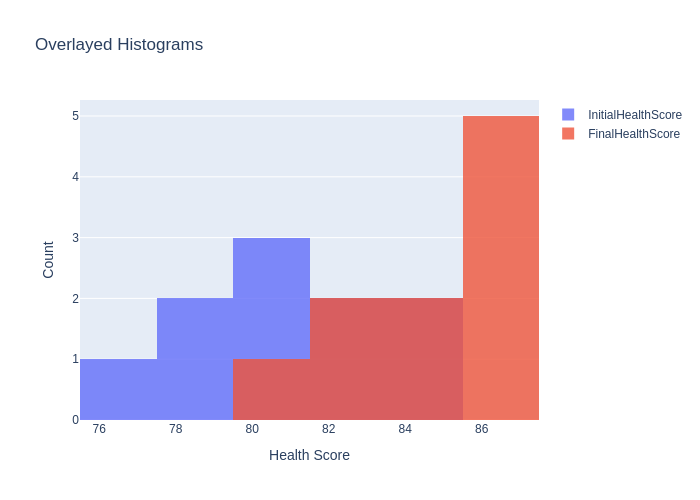

there are 10 rows of data


In [8]:
import pandas as pd
import plotly.graph_objects as go
df: pd.DataFrame
df = pd.read_csv("Alitech.csv")
fig1 = go.Figure()
fig1.add_trace(go.Histogram(x=df.InitialHealthScore, name='InitialHealthScore', nbinsx=5, opacity=0.8))
fig1.add_trace(go.Histogram(x=df.FinalHealthScore, name='FinalHealthScore', nbinsx=5, opacity=0.8))
fig1.update_layout(barmode='overlay', title='Overlayed Histograms', xaxis_title='Health Score', yaxis_title='Count')
fig1.show(renderer='png')
print(f"there are {df.PatientID.count()} rows of data")


$$\text{It looks like there is a positive effect since Final Heakth Score is more concentrated to the right than initial.}$$
$$H_0: \text{there is no difference between initial and final health score.}$$
$$H_A: \text{there is a increment form initial to final health score.}$$

Use bootstrapping

I change the first line so it uses the given data.

In [9]:
import numpy as np
import pandas as pd


data = df.FinalHealthScore - df.InitialHealthScore

# Number of bootstrap samples
n_iterations = 1000
n_size = len(data)

# Generate bootstrap samples and calculate the mean for each sample
bootstrap_means = []
for _ in range(n_iterations):
    sample = np.random.choice(data, size=n_size, replace=True)
    bootstrap_means.append(np.mean(sample))

# Calculate the confidence interval
alpha = 0.95
lower = np.percentile(bootstrap_means, (1 - alpha) / 2 * 100)
upper = np.percentile(bootstrap_means, (1 + alpha) / 2 * 100)

print(f"Bootstrap Mean: {np.mean(bootstrap_means)}")
print(f"{alpha*100}% Confidence Interval: [{lower}, {upper}]")

Bootstrap Mean: 3.2653000000000003
95.0% Confidence Interval: [0.8, 5.5]


0 is not in the confidence interval, so we can reject H_0, there are enough evidence to reject H_0 at 95% confidence level.

9. Somehow